IMPORT LIBRARIES

In [17]:
# Import libraries
# Import pustaka yang dibutuhkan untuk analisis, visualisasi, dan machine learning
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score


## 1. Explanatory Data Analysis (EDA)

In [18]:
# Load Dataset
# Memuat dataset CSV dan mengatur delimiter ke ';' karena format dataset memisahkan kolom dengan titik koma
data = pd.read_csv('bank-full.csv', sep=';')

# Overview of Dataset
# Menampilkan informasi dasar dataset (tipe data, jumlah baris/kolom)
print(data.info())
# Menampilkan statistik deskriptif untuk kolom numerik
print(data.describe())
# Menampilkan 5 baris pertama untuk mendapatkan gambaran struktur dataset
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                age        balance           day      duration      campaign  \
count  45211.0

Dataset terdiri dari 45.211 entri dengan 17 kolom, mencakup data numerik dan kategorikal.


In [19]:
# Encode Target Variable
# Mengonversi target ('y') dari bentuk kategorikal ('no', 'yes') ke numerik (0, 1)
data['y'] = data['y'].map({'no': 0, 'yes': 1})
# Memastikan nilai unik setelah encoding
print(data['y'].unique())  # Output: [0, 1]

[0 1]


Target sudah berhasil dikonversi menjadi bentuk numerik yang diperlukan oleh model.

In [20]:
# Check Missing Values
# Memeriksa apakah ada nilai yang hilang di dataset
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Tidak ada nilai yang hilang di dataset, sehingga tidak perlu penanganan tambahan untuk missing values.

## 2.  Data Visualization (Distribusi dan Boxplot)

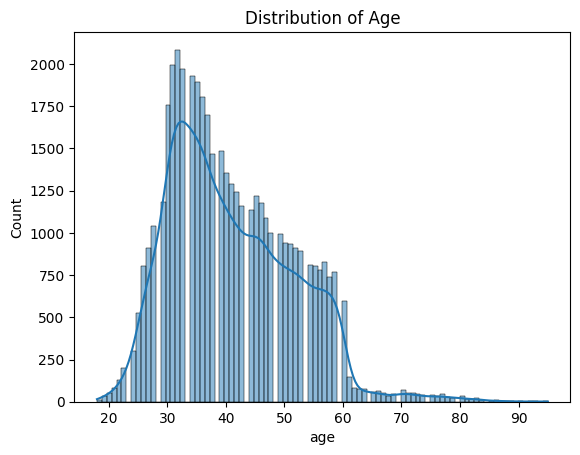

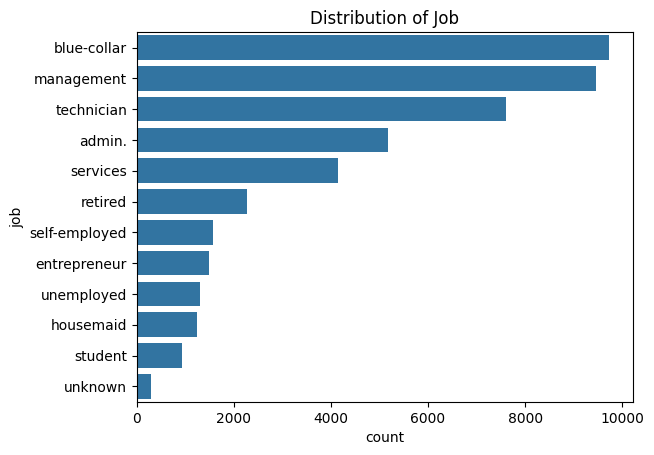

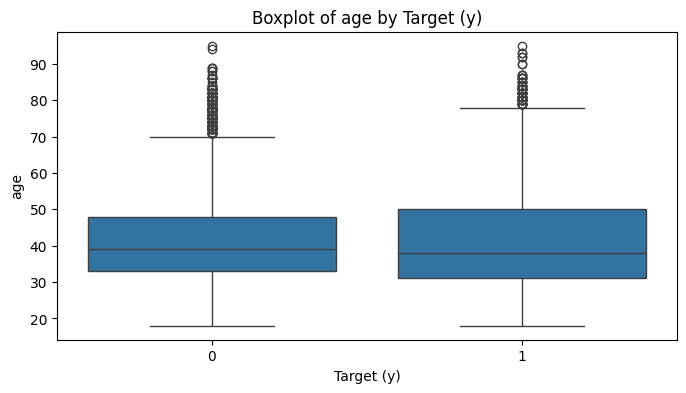

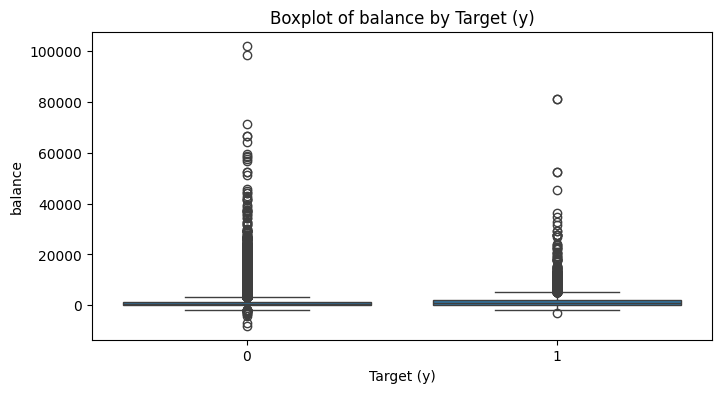

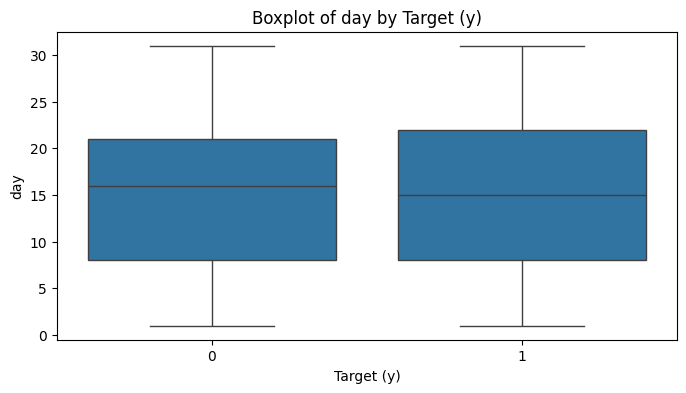

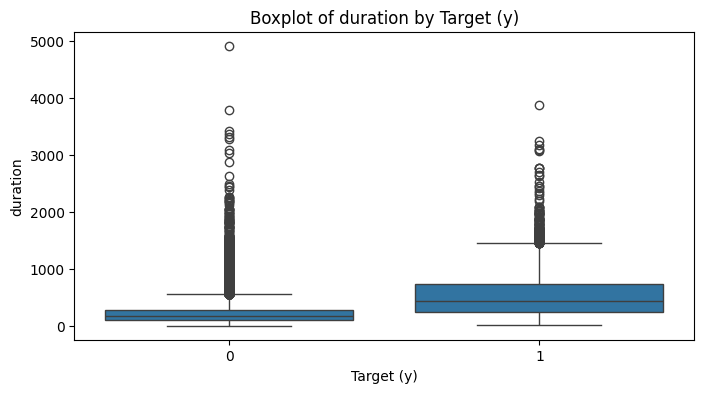

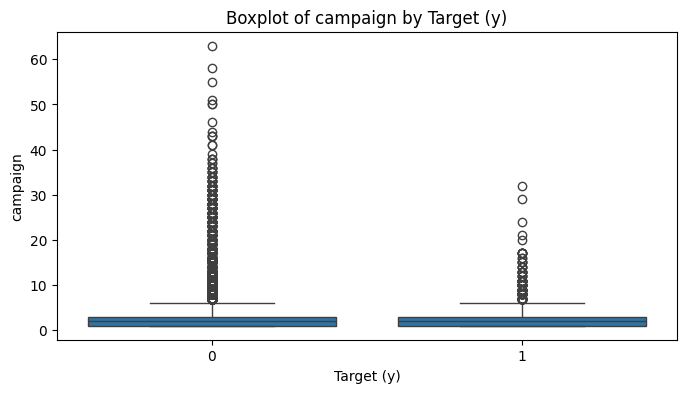

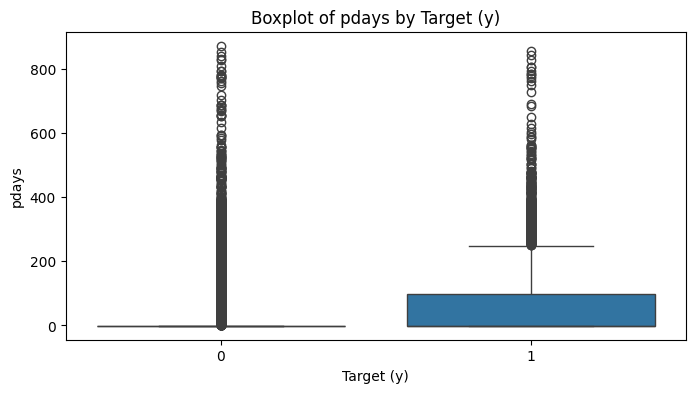

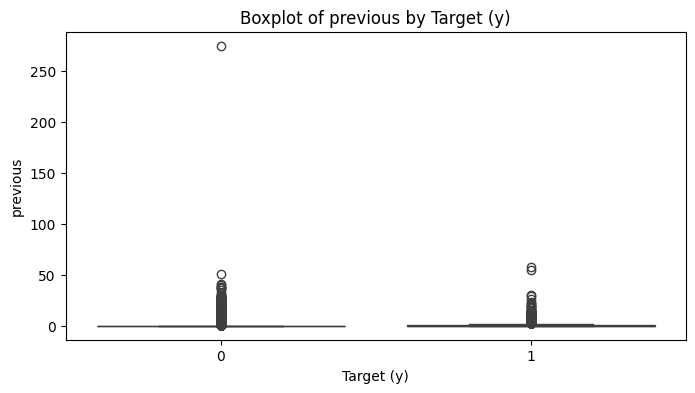

In [16]:
# EDA and Visualization
# 1. Distribution of Age
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# 2. Job Distribution
sns.countplot(y='job', data=data, order=data['job'].value_counts().index)
plt.title('Distribution of Job')
plt.show()

# 3. Boxplot of Numerical Features vs Target
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='y', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Target (y)')
    plt.xlabel('Target (y)')
    plt.ylabel(feature)
    plt.show()




- Pada grafik Distribution of age :
Distribusi umur memiliki puncak di sekitar usia 30-40 tahun, menunjukkan mayoritas nasabah berada di usia produktif.
- Pada grafik Job Distribution : 
Pekerjaan yang paling umum adalah "blue-collar", diikuti oleh "management" dan "technician". 
- Pada Boxplot :
1. Nasabah dengan durasi lebih tinggi cenderung memiliki target 'yes' (y=1).
2. Tidak ada pola signifikan pada variabel lain seperti 'campaign' atau 'pdays'.

## Pipeline dengan scikit-learn

In [21]:
# Split Data into Features and Target
# Memisahkan dataset menjadi fitur (X) dan target (y)
X = data.drop('y', axis=1)
y = data['y']

# Train-Test Split
# Membagi data menjadi data latih dan uji dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Pembagian data dilakukan secara stratified, sehingga proporsi target tetap terjaga di data latih dan uji.

# Preprocessing 

In [22]:
# Preprocessing Pipeline
# Menentukan kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Membuat pipeline preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Normalisasi data numerik
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encoding untuk data kategorikal
    ])

Pipeline memisahkan preprocessing untuk data numerik dan kategorikal agar sesuai dengan kebutuhan model.

# Model Training

In [23]:
# Model Definitions
# Mendefinisikan model yang akan digunakan
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')  # Parameter khusus untuk XGBoost
}

## EVALUATE

In [25]:
# Train and Evaluate Models
# Melatih dan mengevaluasi setiap model
results = {}
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)  # Melatih model
    y_pred = clf.predict(X_test)  # Memprediksi data uji
    acc = accuracy_score(y_test, y_pred)  # Menghitung akurasi
    results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.64      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

Decision Tree Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7985
           1       0.46      0.48      0.47      1058

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.88      0.87      0.87      9043

k-NN Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.60      0.34      0.43      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.66      0.69 

Kesimpulan : Logistic Regression dan XGBoost cenderung memberikan akurasi lebih tinggi dibanding Decision Tree dan k-NN.

## Hyperparameter Tuning dengan GridSearchCV

In [26]:
# Hyperparameter Tuning
# Mendefinisikan parameter grid untuk setiap model
param_grid_lr = {'classifier__C': [0.1, 1, 10]}
param_grid_dt = {'classifier__max_depth': [3, 5, 10]}
param_grid_knn = {'classifier__n_neighbors': [3, 5, 7]}
param_grid_xgb = {'classifier__max_depth': [3, 5], 'classifier__learning_rate': [0.1, 0.01]}

# Melakukan tuning hyperparameter untuk setiap model
param_grids = [param_grid_lr, param_grid_dt, param_grid_knn, param_grid_xgb]

for name, model, param_grid in zip(models.keys(), models.values(), param_grids):
    grid_search = GridSearchCV(estimator=Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)]), param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Best params for {name}: {grid_search.best_params_}")
    print(f"Best accuracy for {name}: {grid_search.best_score_:.2f}")


Best params for Logistic Regression: {'classifier__C': 10}
Best accuracy for Logistic Regression: 0.90
Best params for Decision Tree: {'classifier__max_depth': 5}
Best accuracy for Decision Tree: 0.90
Best params for k-NN: {'classifier__n_neighbors': 7}
Best accuracy for k-NN: 0.90
Best params for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5}
Best accuracy for XGBoost: 0.91


Tuning hyperparameter membantu meningkatkan akurasi dengan mencari kombinasi parameter terbaik.

# Kesimpulan Akhir dari Hyperparameter Tuning

1. Logistic Regression
Parameter terbaik: C = 10
Akurasi terbaik: 90%
Analisis: Logistic Regression menunjukkan kinerja yang sangat baik dengan akurasi 90%. Model ini sederhana, cepat, dan cocok untuk data dengan hubungan linier antara fitur dan target.

2. Decision Tree
Parameter terbaik: max_depth = 5
Akurasi terbaik: 90%
Analisis: Decision Tree memberikan akurasi setara dengan Logistic Regression. Model ini lebih fleksibel dibanding Logistic Regression, namun sedikit lebih rentan terhadap overfitting.

3. k-NN (k-Nearest Neighbors)
Parameter terbaik: n_neighbors = 7
Akurasi terbaik: 90%
Analisis: k-NN memiliki akurasi yang sama dengan Logistic Regression dan Decision Tree, namun memerlukan waktu lebih lama untuk prediksi karena sifatnya sebagai lazy learner. Model ini lebih cocok untuk data yang sudah dinormalisasi dengan baik.

4. XGBoost
Parameter terbaik: learning_rate = 0.1, max_depth = 5
Akurasi terbaik: 91%
Analisis: XGBoost memberikan akurasi tertinggi di antara semua model. Model ini sangat kuat untuk menangani dataset kompleks dan besar. Namun, model ini lebih membutuhkan waktu dan sumber daya komputasi.

Kesimpulan dan Rekomendasi
XGBoost adalah model dengan performa terbaik (akurasi 91%) dan direkomendasikan jika prioritas adalah kinerja optimal, terutama pada dataset kompleks.
Jika interpretasi model atau efisiensi waktu lebih penting, Logistic Regression adalah pilihan yang baik karena memiliki akurasi tinggi (90%) dan lebih mudah dipahami serta diterapkan.